Imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from IPython.display import display

Getting dataset and transforming it into a Tensor

In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root = "./data/FashionMNIST",
    train = True,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()])
)

Loading the dataset

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 30)

Learning from the dataset

In [6]:
len(train_set)

60000

In [7]:
print(train_set.train_labels)

tensor([9, 0, 0,  ..., 3, 0, 5])


/home/arjun/.local/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [8]:
print(train_set.train_labels.unique())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [9]:
print(train_set.train_labels.bincount())

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


###### Thus we come to the understanding that the Fashion MNIST dataset has 10 different targets (from 0 to 9), denoting ten different clothes. There are 6000 of each of them in the dataset. Here each class has exact same number of appearences. We call this balanced class. If a class is not balanced, we should make it balanced to get best results.

Working on train_set

In [10]:
sample = iter(train_set)    # Create an iterator on the train_set

In [11]:
image,label = next(sample)  # Everytime we run this, the iterator loops to the next one.
# display(image)
display(label)

9

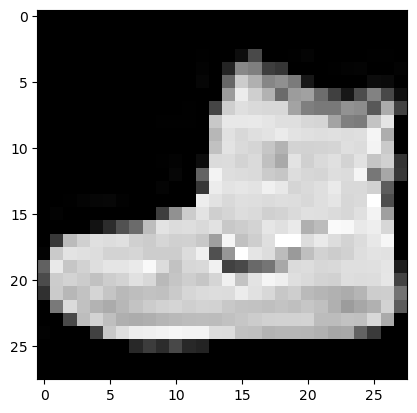

9


In [12]:
plt.imshow(image.squeeze(),cmap = 'gray')
plt.show()
print(label)

Working on train_loader

In [13]:
batch = next(iter(train_loader))
images, labels = batch

In [14]:
print(images.shape) # A batch of 10 images
print((labels.shape))

torch.Size([30, 1, 28, 28])
torch.Size([30])


Making Grid

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4])


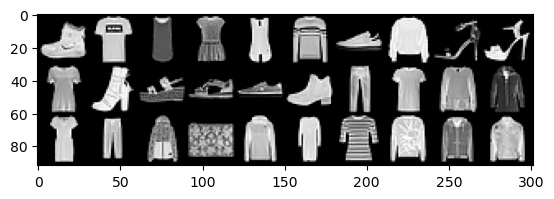

In [15]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.imshow(np.transpose(grid,(1,2,0)))
print(labels)